In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# only run on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
train_data = np.load('./data/train.npz') if 'Eric' in os.uname().nodename else np.load('/content/drive/MyDrive/Colab Notebooks/data/train.npz')

In [29]:
# separate bands and labels into individual data structures to improve performance
bands = train_data['bands']
lulc = train_data['lulc']

# add class labels manually
classes = np.array(['No Data', 'Cultivated Land', 'Forest', 'Grassland', 'Shrubland', 'Water', 'Wetlands', 'Tundra', 'Artificial Surface', 'Bareland', 'Snow and Ice'])

In [156]:
np.histogram(lulc, bins=list(range(len(classes))))

(array([1308,  238, 5796, 1125,  770,   58,    0,    0,  217,  488]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

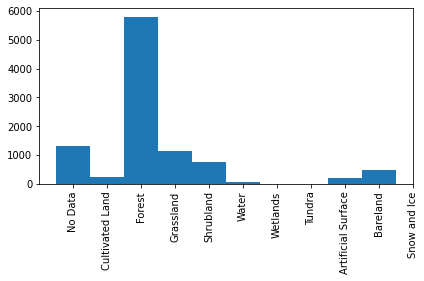

In [120]:
plt.hist(lulc, bins=list(range(len(classes))))
plt.xticks(ticks=list(map(lambda x: x+0.5, list(range(len(classes))))), labels=classes, rotation=90)
plt.tight_layout()
plt.show()

In [139]:
n_patches = bands.shape[0]
n_months = bands.shape[1]
n_classes = len(classes)
n_channels = bands.shape[4]
f'bands: {bands.shape}, lulc: {lulc.shape}, classes: {classes.shape}'

'bands: (10000, 12, 33, 33, 6), lulc: (10000,), classes: (11,)'

In [194]:
# draw random patches
n_samples = 2
rnd_sample = np.random.randint(n_patches, size=n_samples)
#f'random patches: {rnd_patch}, random month: {rnd_month}, corresponding image label: {classes[lulc[rnd_patch]]}'

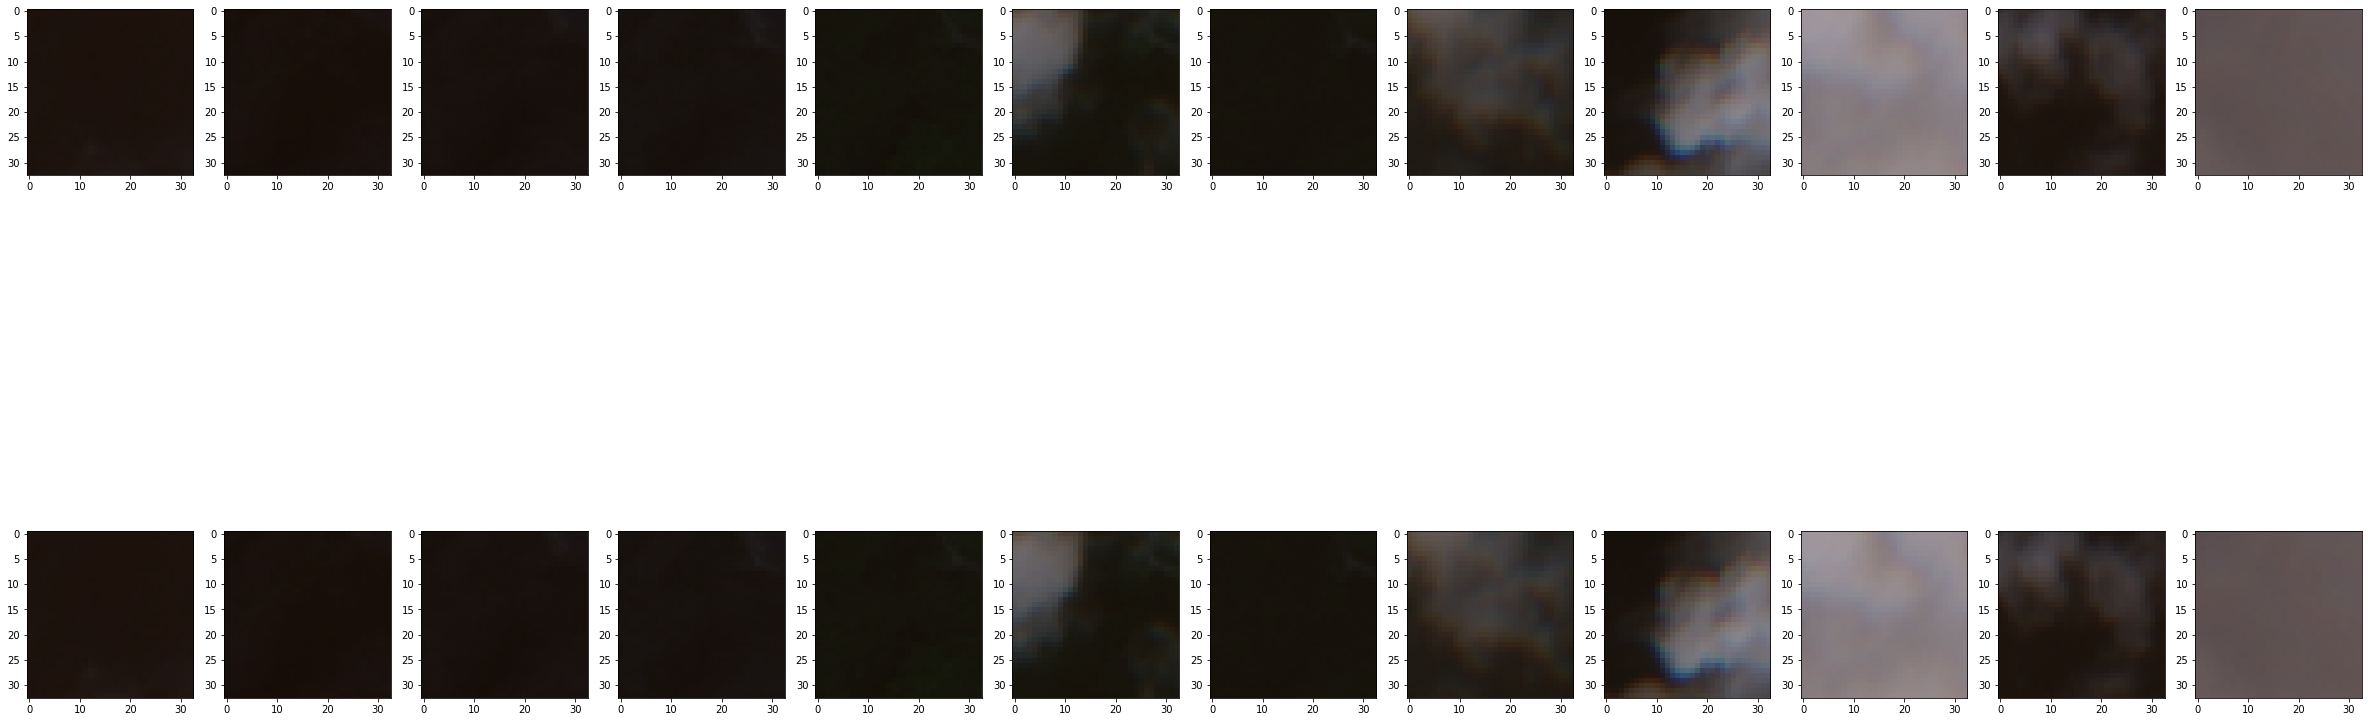

In [198]:
f, axes = plt.subplots(n_samples, n_months, figsize=(33,33))
for sample in range(n_samples):
    for month in range(n_months):
        axes[sample][month].imshow(bands[0][month][:, :, 0:3])
        #axes[sample][month].set_title(f'{month}')
f.tight_layout()
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


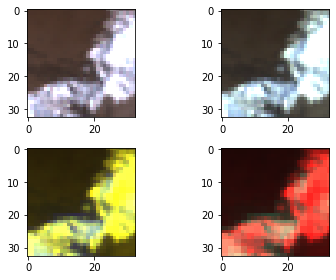

In [186]:
rnd_image = bands[rnd_patch][rnd_month]
f, axes = plt.subplots(2,2)
axes[0,0].imshow(rnd_image[:, :, 0:3])
axes[0,1].imshow(rnd_image[:, :, 1:4])
axes[1,0].imshow(rnd_image[:, :, 2:5])
axes[1,1].imshow(rnd_image[:, :, 3:6])
plt.tight_layout()
plt.show()